In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the file, skipping the header row      sep='\s+'
file_path_pn_con = "/Users/jamiehoskyns/Desktop/Cloudy/pn.con"
data_pn_con = pd.read_csv(file_path_pn_con, sep='\s+', skiprows=1, header=None,on_bad_lines='skip')

file_path_pn_ovr = "/Users/jamiehoskyns/Desktop/Cloudy/pn.ovr"
data_pn_ovr = pd.read_csv(file_path_pn_ovr, sep='\s+', skiprows=1, header=None,on_bad_lines='skip')

file_path_sun_con = "/Users/jamiehoskyns/Desktop/Cloudy/sun.con"
data_sun_con = pd.read_csv(file_path_sun_con, sep='\s+', skiprows=1, header=None,on_bad_lines='skip')

file_path_sun_ovr = "/Users/jamiehoskyns/Desktop/Cloudy/sun.ovr"
data_sun_ovr = pd.read_csv(file_path_sun_ovr, sep='\s+', skiprows=1, header=None,on_bad_lines='skip')

file_path_blr_con = "/Users/jamiehoskyns/Desktop/Cloudy/blr.con"
data_blr_con = pd.read_csv(file_path_blr_con, sep='\s+', skiprows=1, header=None,on_bad_lines='skip')

file_path_blr_ovr = "/Users/jamiehoskyns/Desktop/Cloudy/blr.ovr"
data_blr_ovr = pd.read_csv(file_path_blr_ovr, sep='\s+', skiprows=1, header=None,on_bad_lines='skip')

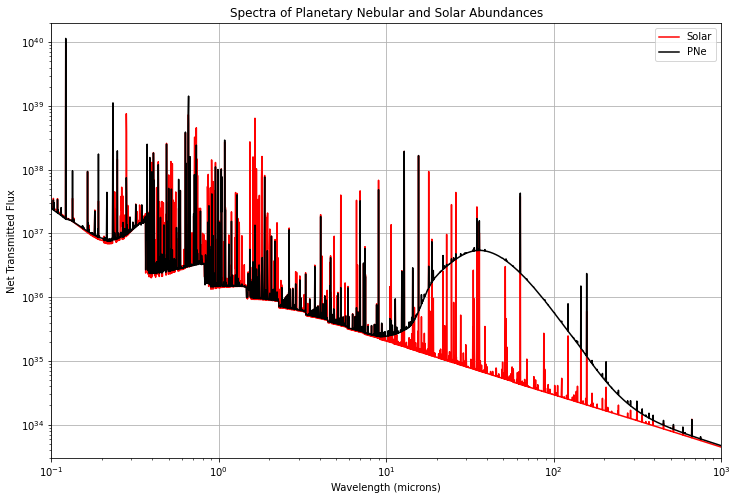

In [2]:
# Define column names based on the header of the file
column_names = [
    "Wavelength", "Incident", "Trans", "DiffOut", "NetTrans",
    "Reflc", "Total", "Reflin", "Outline", "LineID", "Cont", "nLine"
]

# Load the data, skipping the header line
df = pd.read_csv(file_path_pn_con, sep='\t', comment='#', names=column_names)
df["Wavelength"] = pd.to_numeric(df["Wavelength"], errors='coerce')
df["NetTrans"] = pd.to_numeric(df["NetTrans"], errors='coerce')
df.dropna(subset=["Wavelength", "NetTrans"], inplace=True)
filtered_df = df[(df["Wavelength"] > 0) & (df["NetTrans"] > 0)]

df1 = pd.read_csv(file_path_sun_con, sep='\t', comment='#', names=column_names)
df1["Wavelength"] = pd.to_numeric(df1["Wavelength"], errors='coerce')
df1["NetTrans"] = pd.to_numeric(df1["NetTrans"], errors='coerce')
df1.dropna(subset=["Wavelength", "NetTrans"], inplace=True)
filtered_df1 = df1[(df1["Wavelength"] > 0) & (df1["NetTrans"] > 0)]

# Plot the spectrum
plt.figure(figsize=(12, 8))
plt.plot(filtered_df1["Wavelength"], filtered_df1["NetTrans"], label="Solar",color='red')
plt.plot(filtered_df["Wavelength"], filtered_df["NetTrans"], label="PNe",color='black')

plt.xlabel("Wavelength (microns)")
plt.ylabel("Net Transmitted Flux")
plt.title("Spectra of Planetary Nebular and Solar Abundances")
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.1,1000)
plt.ylim(3e33,2e40)
plt.grid(True)
plt.legend()
plt.show()

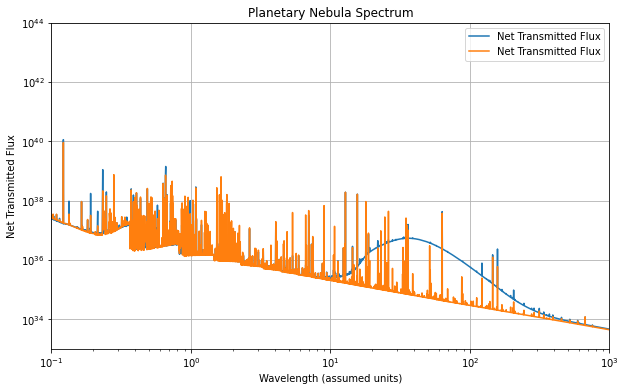

In [3]:
column_names = [
    "Wavelength", "Incident", "Trans", "DiffOut", "NetTrans",
    "Reflc", "Total", "Reflin", "Outline", "LineID", "Cont", "nLine"
]

# Load the data, skipping the header line
df = pd.read_csv(file_path_pn_con, sep='\t', comment='#', names=column_names)

# Convert relevant columns to numeric (handling non-numeric values)
df["Wavelength"] = pd.to_numeric(df["Wavelength"], errors='coerce')
df["Total"] = pd.to_numeric(df["Total"], errors='coerce')

# Drop rows with NaNs in critical columns
df.dropna(subset=["Wavelength", "Total"], inplace=True)

# Filter for strictly positive values to enable log scale plotting
filtered_df = df[(df["Wavelength"] > 0) & (df["Total"] > 0)]

# Plot the spectrum
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["Wavelength"], filtered_df["Total"], label="Net Transmitted Flux")
plt.plot(filtered_df1["Wavelength"], filtered_df1["Total"], label="Net Transmitted Flux")
plt.xlabel("Wavelength (assumed units)")
plt.ylabel("Net Transmitted Flux")
plt.title("Planetary Nebula Spectrum")
plt.xscale("log")
plt.yscale("log")

plt.xlim(0.1,1000)
plt.ylim(1e33,1e44)

plt.grid(True)
plt.legend()
plt.show()

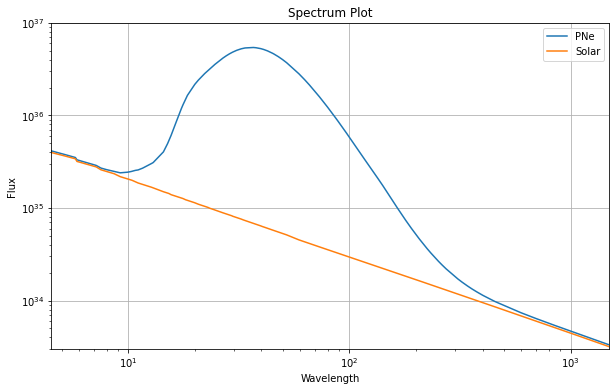

In [4]:
# Extract wavelength (column 0) and total emmision (column 6)
wavelength = data_pn_con[0]
flux = data_pn_con[6]
wavelength_s = solar = data_sun_con[0]
solar = data_sun_con[6]
y = flux/wavelength
y1 = solar/wavelength

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(wavelength, flux, label='PNe')
plt.loglog(wavelength_s, solar, label='Solar')
plt.xlim(4.5,1500)
plt.ylim(3e33,1e37)
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Spectrum Plot')
plt.grid(True)
plt.legend()
plt.show()

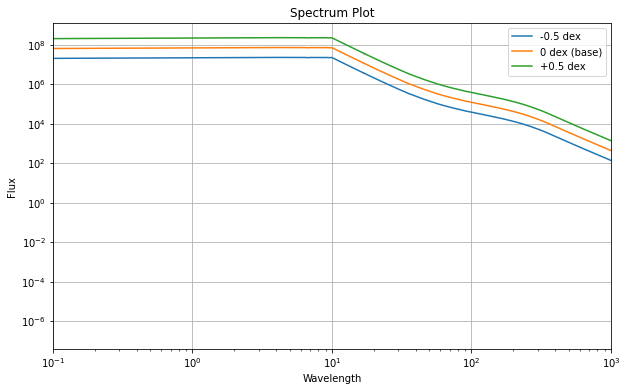

In [5]:
wavelength1 = data_blr_con[0]
flux1 = data_blr_con[4]
scale_factors = [10**(-0.5), 1, 10**0.5]
labels = ["-0.5 dex", "0 dex (base)", "+0.5 dex"]
# Plotting
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.loglog(wavelength1, (flux1*scale_factors[i]), label=labels[i])

plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Spectrum Plot')
plt.xlim(0.1,1000)
plt.grid(True)
plt.legend()
plt.show()

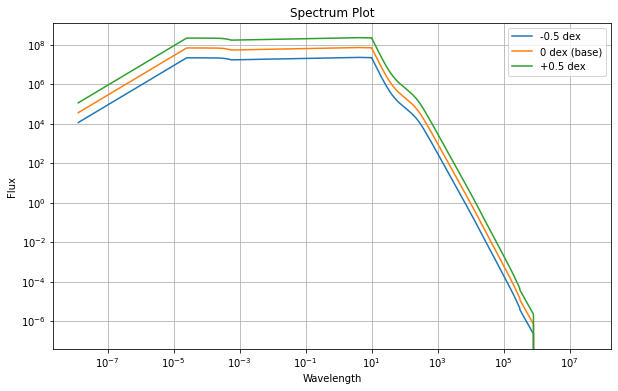

In [6]:
wavelength1 = data_blr_con[0]
flux1 = data_blr_con[6]
scale_factors = [10**(-0.5), 1, 10**0.5]
labels = ["-0.5 dex", "0 dex (base)", "+0.5 dex"]
# Plotting
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.loglog(wavelength1, (flux1*scale_factors[i]), label=labels[i])
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Spectrum Plot')
plt.grid(True)
plt.legend()
plt.show()

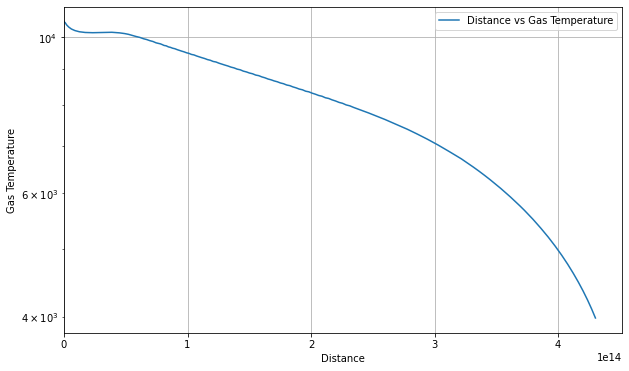

In [8]:
# Extract wavelength (column 0) and intensity (column 6)
distance = data_pn_ovr[0]
gas_temp = data_pn_ovr[1]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(distance,gas_temp,label='Distance vs Gas Temperature')
plt.yscale('log')
plt.xlim(0)
plt.xlabel('Distance')
plt.ylabel('Gas Temperature')
plt.grid(True)
plt.legend()
plt.show()